# Analyse, classification et indexation des données: feuille 7
### Réduction de dimension - Analyse en Composantes Principales (ACP)

In [61]:
import warnings
warnings.filterwarnings("ignore")

#### Avant de commencer

Ecrire une fonction <code> droite2DVd(x, vd, point) </code> permettant de calculer les ordonnées des points <code>(x, ?)</code> de la droite de vecteur directeur <code>vd</code> passant par le point <code>point</code>. Le paramètre <code>x</code> est un vecteur numpy, <code>vd</code> est un tuple <code>(a,b)</code>, <code>point</code> est un tuple <code>(xp, yp)</code>.
Testez votre fonction.

In [62]:
import numpy as np
def droite2DVd(x, vd, point):
    a = vd[1] / vd[0]
    b = point[1] - a * point[0]
    y = a * x + b
    return y


### Exercice 1.

Dans cet exercice, on considère le même dataset que pour le TD précédent (feuille 6). Nous avons un descripteur de taille 2 : chaque poisson est décrit par sa longueur et sa brillance. L'objectif de l'exercice est de passer d'un descripteur de taille 2 à un descripteur de taille 1.

Commencez par charger les données.


In [63]:
import pandas as pa
data = pa.read_csv('https://www.labri.fr/perso/zemmari/datasets/salmon_seabass.csv', delimiter=';', header=0)
data = data.sample(frac=1)
X=data[['width','lightness']]
Y= data[['species']]

In [64]:
print(data)
print(X)
print(Y)

      lightness      width  species
1394   7.656156  11.714139        1
158    1.979941   8.395316        0
1400  11.275839  10.361385        1
1218  12.286673  11.772691        1
139    6.685679   8.112440        0
...         ...        ...      ...
102    8.051423   9.314155        0
1072   6.239862   8.566086        1
1118   7.316997  14.042753        1
1275  15.028337  12.380119        1
357    3.531162   8.494233        0

[1500 rows x 3 columns]
          width  lightness
1394  11.714139   7.656156
158    8.395316   1.979941
1400  10.361385  11.275839
1218  11.772691  12.286673
139    8.112440   6.685679
...         ...        ...
102    9.314155   8.051423
1072   8.566086   6.239862
1118  14.042753   7.316997
1275  12.380119  15.028337
357    8.494233   3.531162

[1500 rows x 2 columns]
      species
1394        1
158         0
1400        1
1218        1
139         0
...       ...
102         0
1072        1
1118        1
1275        1
357         0

[1500 rows x 1 columns]


1- Ecrire   une   fonction  <code>calculACP(echantillon, d=1)</code> qui réalise l'ACP sur un ensemble d'exemples. Chaque ligne de <code>echantillon</code> (DataFrame) contient les descripteurs associés à un exemple. La fonction retourne les <code>d</code> vecteurs propres calculés de plus grandes valeurs propres. Ils seront triés en fonction de leur valeur propre, de la plus grande à la plus petite. Tester la fonction sur le dataset.

In [65]:
def calculACP(echantillon, d=1):
    """
    Réalise l'Analyse en Composantes Principales (ACP) sur un ensemble d'exemples.

    Args:
        echantillon (DataFrame): Un DataFrame contenant les descripteurs associés à chaque exemple.
        d (int): Le nombre de vecteurs propres à retourner. Par défaut, 1.

    Returns:
        DataFrame: Un DataFrame contenant les d vecteurs propres calculés (triés par valeur propre, de la plus grande à la plus petite).
    """
    # Centrage des données
    nu = echantillon.mean()
    omega = echantillon.std()
    D = (echantillon - nu) / omega

    # Matrice de covariance
    #S=(len(echantillon)-1).D.conv()
    S = (D.T @ D) / (len(echantillon) - 1)

    # Calcul des valeurs propres et vecteurs propres
    lambda_, p = np.linalg.eig(S)

    # Trier les vecteurs propres en fonction des valeurs propres
    sorted_indices = np.argsort(lambda_)[::-1]
    W = p[:, sorted_indices[:d]]
    #W=p[np.argsort(lambda_)][::-1][:k].T

    # Projection des données sur les d vecteurs propres
    return D @ W


2- Ecrire une fonction <code>projection (W, echantillon)</code>  qui prend une matrice de
projection <code>W</code> et un échantillon et qui retourne la projection de cet
ensemble. 

In [140]:
def projection (W, echantillon):
    resultats_projection = echantillon @ W
    return resultats_projection

3- Visualiser le résultat de la réduction de dimension sur le dataset. Vous afficherez le nuage de points initial en 2D et la projection de ce nuage en 1D.

##### Avant la projection : 

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import time

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Text(0, 0.5, 'Lightness')

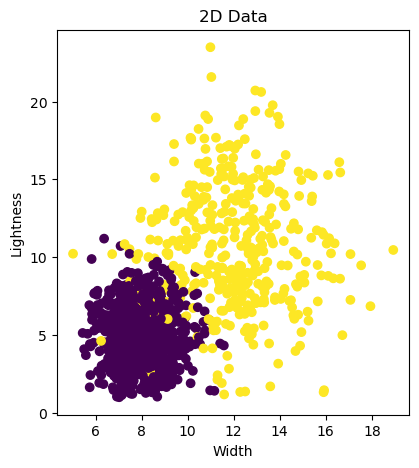

In [142]:
import matplotlib.pyplot as plt

# Create a scatter plot for the original 2D data
plt.figure(figsize=(10, 5))
plt.subplot(121)  # First subplot for 2D data

plt.scatter(X_train['width'], X_train['lightness'], c=Y_train['species'], cmap='viridis')
plt.title('2D Data')
plt.xlabel('Width')
plt.ylabel('Lightness')

#### Après la projection :

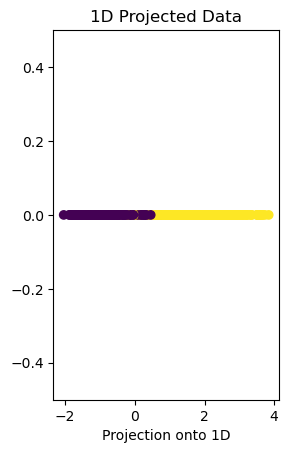

In [143]:
# Visualisation en 1D (projection)

reduced_data = calculACP(X_train, d=1)
plt.subplot(122)  # Second subplot for 1D projected data

plt.scatter(reduced_data, np.zeros_like(reduced_data), c=Y_train['species'], cmap='viridis')
plt.title('1D Projected Data')
plt.xlabel('Projection onto 1D')
plt.ylim(-0.5, 0.5)  # Set the y-axis range for 1D data

plt.show()

In [144]:
print(reduced_data)

             0
700  -0.630652
1142 -0.289757
903  -1.148199
669  -0.554012
1019  0.212200
...        ...
1367  0.776632
664   0.277462
234  -0.652624
624   0.453732
827  -0.929838

[1200 rows x 1 columns]


4- En utilisant un classifieur bayésien MAP, comparez les résultats obtenus avec l'échantillon brut (descripteur de dimension 2) et les résultats obtenus avec l'échantillon projeté sur l’axe de plus grande valeur propre (descripteur de dimension 1). Comparez également les temps d'entraînement.

In [148]:
# Train and evaluate the classifier on the raw 2D data
start_time = time.time()
classifier_raw = GaussianNB()
classifier_raw.fit(X_train, Y_train)
training_time_raw = time.time() - start_time
Y_pred_raw = classifier_raw.predict(X_test)
accuracy_raw = accuracy_score(Y_test, Y_pred_raw)
report_raw = classification_report(Y_test, Y_pred_raw)


In [149]:
# Train and evaluate the classifier on the 1D projected data

start_time = time.time()
classifier_raw = GaussianNB()
pca = PCA(n_components=1)
components_train = pca.fit_transform(X_train)
classifier_raw.fit(components_train, Y_train)
#classifier_raw.fit(reduced_data, Y_train)
training_time_projected = time.time() - start_time

#components_test = calculACP(X_test, d=1)
components_test = pca.transform(X_test)
Y_pred_projected = classifier_raw.predict(components_test)
accuracy_projected = accuracy_score(Y_test, Y_pred_projected)
report_projected = classification_report(Y_test, Y_pred_projected)

In [151]:

# Compare results
print("Classifier on raw 2D data:")
print(f"Training Time: {training_time_raw} seconds")
print(f"Accuracy: {accuracy_raw}")
print(report_raw)

print("\nClassifier on 1D projected data:")
print(f"Training Time: {training_time_projected} seconds")
print(f"Accuracy: {accuracy_projected}")
print(report_projected)


Classifier on raw 2D data:
Training Time: 0.009437084197998047 seconds
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       191
           1       0.99      0.93      0.96       109

    accuracy                           0.97       300
   macro avg       0.97      0.96      0.97       300
weighted avg       0.97      0.97      0.97       300


Classifier on 1D projected data:
Training Time: 0.013973474502563477 seconds
Accuracy: 0.9233333333333333
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       191
           1       0.94      0.84      0.89       109

    accuracy                           0.92       300
   macro avg       0.93      0.91      0.92       300
weighted avg       0.92      0.92      0.92       300



5- Même question avec un $k$-nn.

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import time
from sklearn.decomposition import PCA

# Assuming X_train, Y_train, X_test, Y_test are defined

# Fit PCA on the training data
pca = PCA(n_components=1)
components_train = pca.fit_transform(X_train)

# Train k-NN classifier
start_time = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (n_neighbors) as needed
knn_classifier.fit(components_train, Y_train)
training_time_knn = time.time() - start_time

# Transform testing data using the same PCA model
components_test = pca.transform(X_test)

# Predict using k-NN
Y_pred_knn = knn_classifier.predict(components_test)

# Evaluate performance
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
report_knn = classification_report(Y_test, Y_pred_knn)

In [153]:
print("\nClassifier on k-nn data:")
print(f"Training Time: {training_time_knn} seconds")
print(f"Accuracy: {accuracy_knn}")
print(report_knn)


Classifier on k-nn data:
Training Time: 0.004705667495727539 seconds
Accuracy: 0.9066666666666666
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       191
           1       0.88      0.86      0.87       109

    accuracy                           0.91       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.91      0.91      0.91       300



### Exercice 2.

Dans cet exercice, nous allons travailler avec un dataset contenant des données sur le cancer du sein. Le dataset 
peut être chargé par l'instruction <code> load_breast_cancer</code> de la bibliothèque <code>sklearn.datasets</code>.

Commencer par charger les données, et les explorer.



1- Faites une ACP en utilisant le module <code>PCA</code> de la bibliothèque <code>sklearn.decomposition</code>.  

Attention : pensez à centrer et réduire vos données.

2- Affichez l'éboulie des valeurs propres et indiquer le nombre d'axes à retenir en utilisant le critère du coude. 

3- Combien d'axes faut-il retenir pour garder au moins 80% de la variance ?

4- En ne gardant que 3 axes,  étudier l'impact de la réduction sur la qualité d'un classifieur de votre choix. 

5- Commenter les résultats